<a href="https://colab.research.google.com/github/Musabbirstar/Skill-Morph/blob/main/Skill_Morph_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [88]:
gym = pd.read_csv('/content/drive/MyDrive/Datasets/gym_membership.csv')
gym

,id,gender,birthday,Age,abonoment_type,visit_per_week,days_per_week,attend_group_lesson,fav_group_lesson,avg_time_check_in,avg_time_check_out,avg_time_in_gym,drink_abo,fav_drink,personal_training,name_personal_trainer,uses_sauna
0,1,Female,1997-04-18,27,Premium,4,"Mon, Sat, Tue, Wed",True,"Kickboxen, BodyPump, Zumba",19:31:00,21:27:00,116,False,NaN,False,NaN,True
1,2,Female,1977-09-18,47,Standard,3,"Mon, Sat, Wed",False,NaN,19:31:00,20:19:00,48,False,NaN,True,Chantal,False
2,3,Male,1983-03-30,41,Premium,1,Sat,True,XCore,08:29:00,10:32:00,123,True,"berry_boost, lemon",True,Mike,False
3,4,Male,1980-04-12,44,Premium,3,"Sat, Tue, Wed",False,NaN,09:54:00,11:33:00,99,True,passion_fruit,True,Mike,True
4,5,Male,1980-09-10,44,Standard,2,"Thu, Wed",True,"Running, Yoga, Zumba",08:29:00,09:19:00,50,False,NaN,True,Mike,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Female,1984-09-22,40,Standard,3,"Thu, Tue, Wed",False,NaN,20:56:00,22:42:00,106,False,NaN,False,NaN,False
996,997,Female,2008-11-19,15,Standard,3,"Fri, Mon, Sun",True,"XCore, Zumba",09:14:00,11:28:00,134,True,"orange, lemon",False,NaN,True
997,998,Male,1984-10-05,40,Standard,2,"Fri, Tue",False,NaN,17:21:00,19:53:00,152,True,"coconut_pineapple, black_currant",True,Jeffrey,True
998,999,Male,2001-02-22,23,Standard,4,"Mon, Sun, Thu, Tue",True,"HIT, XCore",10:23:00,12:29:00,126,True,berry_boost,True,Jeffrey,False


In [89]:
gym.columns

Index(['id', 'gender', 'birthday', 'Age', 'abonoment_type', 'visit_per_week',
       'days_per_week', 'attend_group_lesson', 'fav_group_lesson',
       'avg_time_check_in', 'avg_time_check_out', 'avg_time_in_gym',
       'drink_abo', 'fav_drink', 'personal_training', 'name_personal_trainer',
       'uses_sauna'],
      dtype='object')

In [90]:
gym.dtypes

,0
id,int64
gender,object
birthday,object
Age,int64
abonoment_type,object
visit_per_week,int64
days_per_week,object
attend_group_lesson,bool
fav_group_lesson,object
avg_time_check_in,object


In [91]:
gym.describe()

,id,Age,visit_per_week,avg_time_in_gym
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,30.604000,2.682000,105.260000
std,288.819436,10.817958,1.241941,43.557177
min,1.000000,12.000000,1.000000,30.000000
25%,250.750000,21.000000,2.000000,67.000000
50%,500.500000,30.000000,3.000000,104.000000
75%,750.250000,40.000000,3.000000,143.000000
max,1000.000000,49.000000,5.000000,180.000000


In [92]:
gym.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     1000 non-null   int64 
 1   gender                 1000 non-null   object
 2   birthday               1000 non-null   object
 3   Age                    1000 non-null   int64 
 4   abonoment_type         1000 non-null   object
 5   visit_per_week         1000 non-null   int64 
 6   days_per_week          1000 non-null   object
 7   attend_group_lesson    1000 non-null   bool  
 8   fav_group_lesson       503 non-null    object
 9   avg_time_check_in      1000 non-null   object
 10  avg_time_check_out     1000 non-null   object
 11  avg_time_in_gym        1000 non-null   int64 
 12  drink_abo              1000 non-null   bool  
 13  fav_drink              496 non-null    object
 14  personal_training      1000 non-null   bool  
 15  name_personal_trainer 

In [93]:
gym.isnull().sum()

,0
id,0
gender,0
birthday,0
Age,0
abonoment_type,0
visit_per_week,0
days_per_week,0
attend_group_lesson,0
fav_group_lesson,497
avg_time_check_in,0


In [94]:
gym['fav_group_lesson'] = gym['fav_group_lesson'].fillna('Unknown')
gym['fav_drink'] = gym['fav_drink'].fillna('Unknown')
gym['name_personal_trainer'] = gym['name_personal_trainer'].fillna('No Trainer')

In [95]:
gym.isnull().sum()

,0
id,0
gender,0
birthday,0
Age,0
abonoment_type,0
visit_per_week,0
days_per_week,0
attend_group_lesson,0
fav_group_lesson,0
avg_time_check_in,0


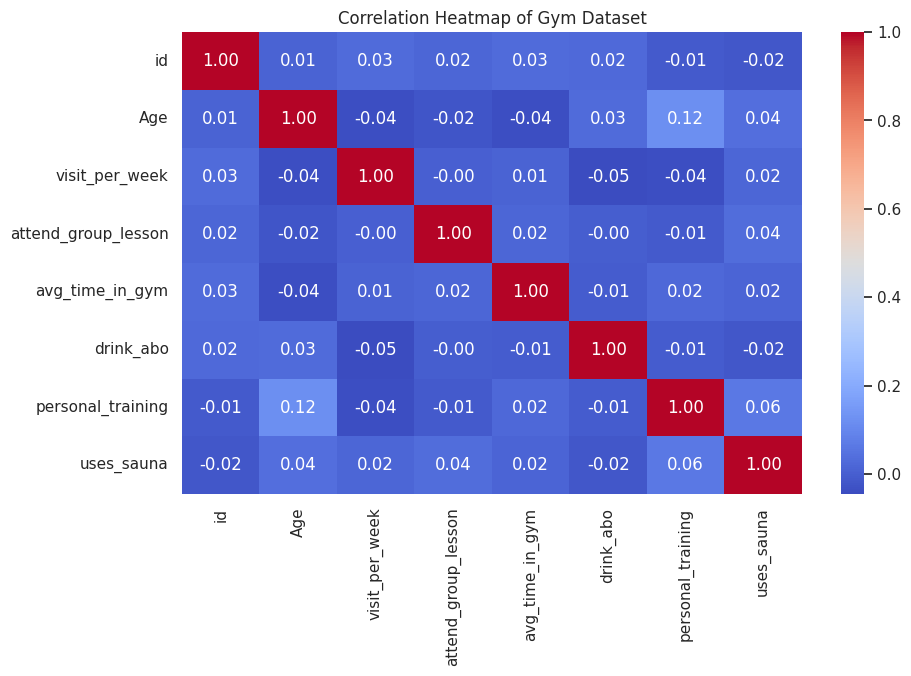

In [96]:
plt.figure(figsize=(10,6))
sns.heatmap(gym.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Gym Dataset")
plt.show()

In [97]:
# gym_encoded = gym.copy()

# encoder = LabelEncoder()
# for col in ['fav_group_lesson', 'fav_drink', 'gender', 'abonoment_type']:
#   gym_encoded[col] = encoder.fit_transform(gym_encoded[col])

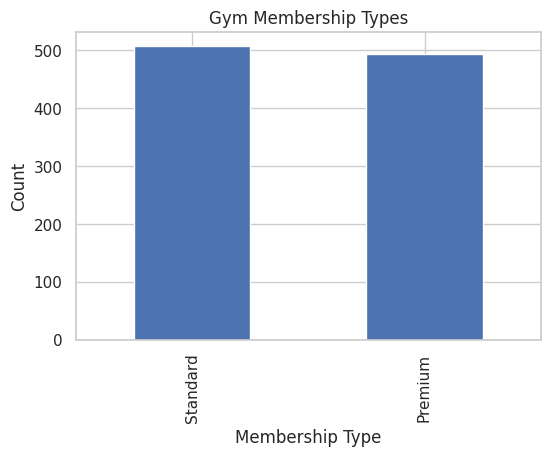

In [98]:
plt.figure(figsize=(6,4))
gym['abonoment_type'].value_counts().plot(kind='bar')
plt.title('Gym Membership Types')
plt.xlabel('Membership Type')
plt.ylabel('Count')
plt.show()

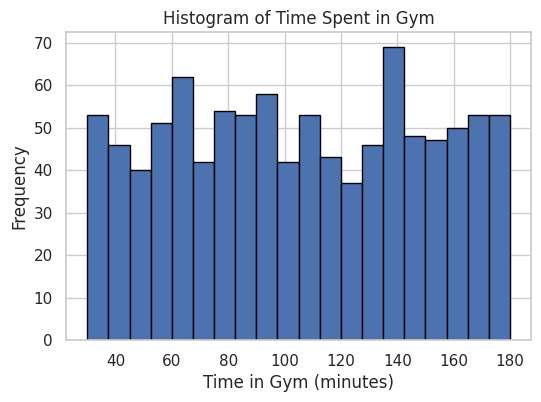

In [99]:
plt.figure(figsize=(6,4))
plt.hist(gym['avg_time_in_gym'], bins=20, edgecolor='black')
plt.title('Histogram of Time Spent in Gym')
plt.xlabel('Time in Gym (minutes)')
plt.ylabel('Frequency')
plt.show()

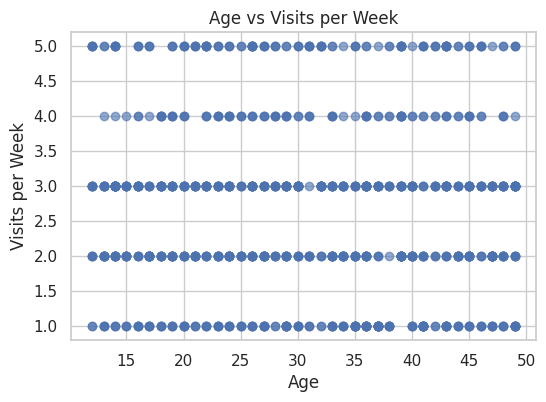

In [100]:
plt.figure(figsize=(6,4))
plt.scatter(gym['Age'], gym['visit_per_week'], alpha=0.6)
plt.title('Age vs Visits per Week')
plt.xlabel('Age')
plt.ylabel('Visits per Week')
plt.show()

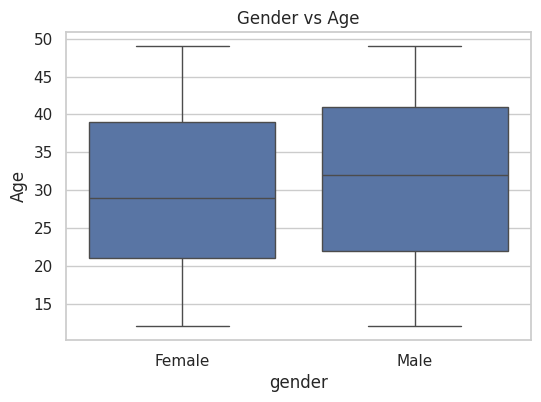

In [101]:
plt.figure(figsize=(6,4))
sns.boxplot(data=gym, x='gender', y='Age')
plt.title('Gender vs Age')
plt.show()

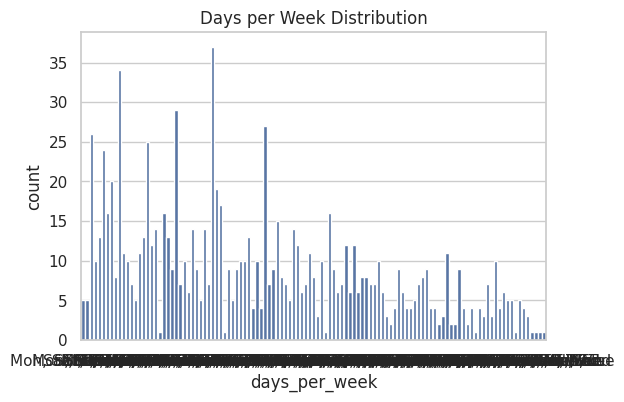

In [102]:
plt.figure(figsize=(6,4))
sns.countplot(data=gym, x='days_per_week')
plt.title('Days per Week Distribution')
plt.show()

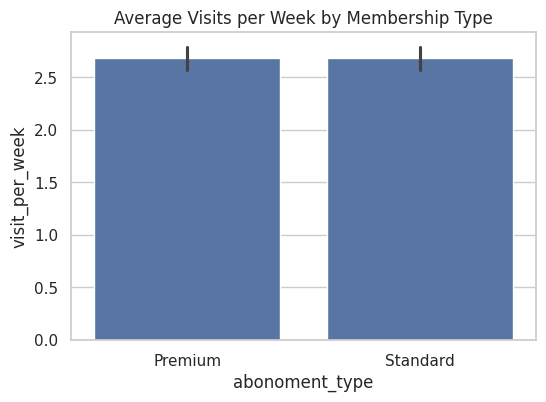

In [103]:
plt.figure(figsize=(6,4))
sns.barplot(data=gym, x='abonoment_type', y='visit_per_week', estimator='mean')
plt.title('Average Visits per Week by Membership Type')
plt.show()